In [7]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2


import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl

#paths
savefigpath  = 'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
#'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

In [ ]:
# BEHAVIOR: Sample animal plot
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
# recordingDate = info.recordingList.recordingDate
# recordingDate[indList]
s_animalID = 22107
s_stimuliID = 5 # For training sessions 
indList = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
indList = indList[0]
if s_animalID == 22101:
    indList = indList[:-2]
elif s_animalID == 22102:
    indList = indList[:-3]
fRate = 20000

    
# Create behaviour sessions plots
animal_lick  =[]
animal_water =[]
for ind in (indList):
    savepathname = info.recordingList.analysispathname[ind]
    pathname = [f for f in glob.glob(savepathname + 'training-paq-data.pkl')]
    paqData = pd.read_pickle (pathname[0])
    # Get the stim start times 
    trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)

    trialStartTimes = trialStartTimes - (2*fRate)

    if len(trialStartTimes)<500:
        licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection', stimulation = False)
        waterPoints, trial_water = utils.lick_binner(savepathname,trialStartTimes, 'waterDelivery', stimulation = False)

        animal_lick = animal_lick + trial_licks
        animal_water = animal_water + trial_water

fig = plt.figure(str(ind))
for i, array in enumerate(animal_lick):
    plt.plot(array, np.ones_like(array)+i, 'k.',markersize = 1)
    plt.plot(animal_water[i], np.ones_like(animal_water[i])+i+0.3, 'bo',markersize = 2)
                
plt.xlim(0, 8*fRate)
ymax = 900

plt. ylim(0, ymax)
plt.yticks(range(0,ymax, 150), range(ymax,0, -150))
plt.xticks (range(0,(8*fRate)+1,fRate), range(-2,7,1))
plt.ylabel('Trials')
plt.xlabel('Time (sec)')
plt.title(str(s_animalID))
savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
pfun.save_figure( 'Figure3_ExampleAnimalBeh',savepathname)
plt.close(fig)


In [10]:
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 1500.0 # in ms
analysis_time = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

# load data
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting_normalisedtoPre.pkl'
dff_traceBoth, dff_traceVis, dff_traceOpto  = pd.read_pickle(infoPath) 

#infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting_normalised.pkl'
#dff_traceBoth_normalised, dff_traceVis_normalised, dff_traceOpto_normalised = pd.read_pickle(infoPath) 

In [11]:
mfun.selectInterestedcells ( cohort, condition, responsive = cellresponsiveness, plotValues = True, pupil = False )

All cell number:6087
Any responsive cell number:3122
Visual cue - all visual responsive cells: 1307
Visual cue - only visual responsive: 700
Visual only cue - EXC opto responsive: 0.58
Visual only cue - INH opto responsive: 0.42
Opto stimulation - all opto responsive cells: 1720
Opto stimulation - only opto responsive: 1113
Opto stimulation - EXC opto responsive: 0.37735849056603776
Opto stimulation - INH opto responsive: 0.6226415094339622
Both - all both responsive cells:1799
Both - only both responsive: 702
Both - EXC opto responsive: 0.4458689458689459
Both - INH opto responsive: 0.5541310541310541


array([False, False, False, ..., False, False, False])

In [12]:
dff_meanVis1sec = np.nanmean(dff_traceVis[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)

C:\Users\Huriye\AppData\Local\Temp\ipykernel_20024\3232173026.py:1: RuntimeWarning: Mean of empty slice
  dff_meanVis1sec = np.nanmean(dff_traceVis[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)


C:\Users\Huriye\AppData\Local\Temp\ipykernel_20024\2661943590.py:15: RuntimeWarning: Mean of empty slice
  dff_meanVis1sec = np.nanmean(dff_traceVis[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)


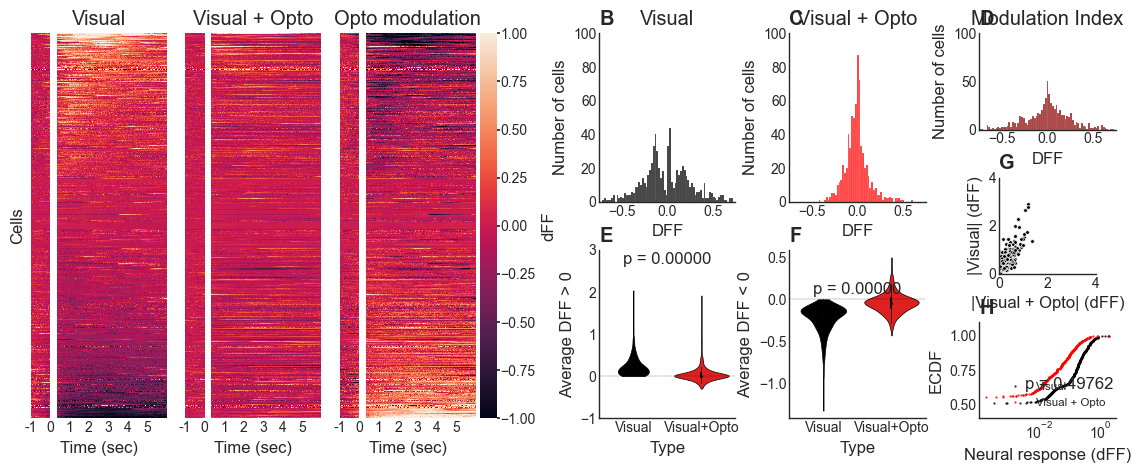

In [16]:
# Figure 3: Population analysis
savefigpath  = 'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\' 
ylimitsforhist = [0, 100]
xlimitsforhist = [-0.75, 0.75]
analysis_time = 1500 # in ms

condition  ='Trained'
cohort     = 'Chrimson'
colormap   =  None
cellresponsiveness = 'Visual'
violinFaceColors = ['black', 'red', 'darkred']
colorbarlimitsForHeatMap = [-1,1] 
responsiveCells = mfun.selectInterestedcells ( cohort, condition, responsive = cellresponsiveness, plotValues = False, pupil = False )
# sort based on visual response
dff_meanVis1sec = np.nanmean(dff_traceVis[:, pre_frames:(pre_frames + simulationDur + analysis_time)], axis=1)
savefigname = 'Figure3-Visual_' + cohort + condition + cellresponsiveness
pfun.population_plots(responsiveCells, dff_traceVis, dff_traceBoth, dff_meanVis1sec,
                    analysis_time, colormap,
                    ylimitsforhist,xlimitsforhist,
                    violinFaceColors,colorbarlimitsForHeatMap,
                    savefigname =savefigname ,savefigpath = savefigpath )




In [ ]:
animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
s_animalID = 2303
print(s_animalID)
indList = np.where((np.array(animalID) == s_animalID)& (np.array(stimuliID) == s_stimuliID ))
indListAll = indList[0]
indListAll




In [ ]:
# BEHAVIOR: Average lick plot during learning
    
# BEHAVUIOR SAMPLE TRAINED ANIMAL
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
    
animalList = [2304 ]#22101, 22103, 22104, 22105, 22106, 22107
fRate = 20000
s_stimuliID = 5 # For training sessions
types = ['Last Sessions', 'First Sessions']

fig = plt.figure()
pfun.set_figure()

# Create behaviour sessions plots
for s_animalID in animalList: 
    print(s_animalID)
    indList = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
    indListAll = indList[0]
    print(indList)
    if s_animalID == 22101:
        indListAll = indListAll[:-2]
    elif s_animalID == 22102:
        indListAll = indListAll[:-3]
    elif s_animalID == 22103:
        indListAll = indListAll[2:]
    elif s_animalID == 2303:
        indListAll = indListAll[:-1]
    elif s_animalID == 2304:
        indListAll = indListAll[:-1]

    for type in types:
        if type == 'Last Sessions':
            indList = indListAll[:2]
            colorV = 'r'
        elif type == 'First Sessions':
            indList = indListAll[-2:]
            colorV = 'k'
        animal_lick  =[]
        animal_water =[]
        for ind in (indList):
            print(ind)
            savepathname = info.recordingList.analysispathname[ind]
            print(savepathname)
            pathname = [f for f in glob.glob(savepathname + 'training-paq-data.pkl')]
            print(pathname)
            paqData = pd.read_pickle (pathname[0])
            # Get the stim start times 
            trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)

            trialStartTimes = trialStartTimes - (2*fRate)

            if len(trialStartTimes)<500:
                licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection', stimulation=False)
                animal_lick = animal_lick + trial_licks
        
        bin_width = 10  # Adjust this value to change the width of each bin
        num_bins = range(0, 8*fRate, int(fRate/bin_width))
       
        animal_hist = np.zeros(len(num_bins)-1)
        for i, array in enumerate(animal_lick):
            hist, bins = np.histogram(array, bins=num_bins, range=(0, 8*fRate))
            animal_hist = animal_hist + hist
        animal_hist = animal_hist/ (i+1)/bin_width
        plt.plot( bins[1:],animal_hist, colorV, linewidth =1, alpha= 0.5)

        if type == 'First Sessions':
            if s_animalID == animalList[0]:
                animal_hist_FirstAll = animal_hist
            else:
                animal_hist_FirstAll = np.vstack((animal_hist_FirstAll,animal_hist))
        else:
            if s_animalID == animalList[0]:
                animal_hist_LastAll = animal_hist
            else:
                animal_hist_LastAll = np.vstack((animal_hist_LastAll,animal_hist))

plt.plot( bins[1:],np.mean(animal_hist_LastAll,0 ), 'r', linewidth =3, alpha= 1, label = 'Last Sessions')
plt.plot( bins[1:],np.mean(animal_hist_FirstAll,0), 'k', linewidth =3, alpha= 1, label = 'First Sessions')
plt.legend()
plt.xlim(0, 8*fRate)
plt.xticks (range(0,(8*fRate)+1,fRate), range(-2,7,1))
plt.ylabel('Lick Density')
plt.xlabel('Time (sec)')
plt.title('All animals')
savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
pfun.save_figure( 'Figure3_AverageLickDensity',savepathname)
#plt.close(fig)



In [ ]:
print(animalID)
ind = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
print(ind)

In [ ]:
# BEHAVIOR: Average lick plot for cue stimulated sessions 
    
# BEHAVUIOR SAMPLE TRAINED ANIMAL
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
    
animalList = [2309,2310,2312]
fRate = 20000
s_stimuliID =  4# For cue stimulated session
types = ['Stimulated', 'Not stimulated']
duration = 10 # second -2 to 8 sec
bin_width = 5# Adjust this value to change the width of each bin

#fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
pfun.set_figure()


# Create behaviour sessions plots
for s_animalID in animalList: 
    ind = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
    ind = ind[0][0]
    print(ind)

    savepathname = info.recordingList.analysispathname[ind]
    print(savepathname)
    pathname = [f for f in glob.glob(savepathname + 'paq-data.pkl')]
    paqData = pd.read_pickle (pathname[0])
    # Get the stim start times 
    trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)
    optoStimTimes = utils.paq_data (paqData, 'optoLoopback', 1, threshold_ttl=True)
    print(['optoStimTimes how many?:' + str(len(optoStimTimes))])
    # Clean the triggers from stimulation frequencies
    first_ind = np.where(np.diff(optoStimTimes)>1*fRate)
    first_ind = np.concatenate(([0], first_ind[0]+1))
    optoStimTimes = np.array(optoStimTimes)
    optoStimTimes = optoStimTimes[first_ind]
    if s_stimuliID ==4:
        optoStimTimes = optoStimTimes - (2*fRate)
    elif s_stimuliID ==3:
        if s_animalID ==22101:
            optoStimTimes = optoStimTimes -1
        else:
            optoStimTimes = optoStimTimes

    print('optoStimTimes how many?:' + str(len(optoStimTimes)))
    print('trialStartTimes how many?:' + str(len(trialStartTimes)))
    if s_animalID ==22107:
        trialStartTimes = trialStartTimes[1:75]
    common_indices = np.where(np.isin(trialStartTimes, np.intersect1d(trialStartTimes, optoStimTimes)))
    print(common_indices)
    not_common_indices = np.where(np.isin(trialStartTimes, np.setdiff1d(trialStartTimes, optoStimTimes)))
    print(len(not_common_indices))

    trialStartTimes = trialStartTimes - (2*fRate)
    

    licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection')
    animal_lick = trial_licks


    num_bins = range(0, duration*fRate, int(fRate/bin_width))
       
    animal_hist = np.zeros(len(num_bins)-1)
    for i in np.nditer(common_indices):
        array = animal_lick[i]
        hist, bins = np.histogram(array, bins=num_bins, range=(0, duration*fRate))
        animal_hist = animal_hist + hist
    animal_hist = animal_hist/(i+1)/bin_width
    plt.plot( bins[1:],animal_hist, 'r', linewidth =1)

    if s_animalID == 22101:
        animal_hist_FirstAll = animal_hist
    else:
        animal_hist_FirstAll = np.vstack((animal_hist_FirstAll,animal_hist))

    animal_hist = np.zeros(len(num_bins)-1)
    for i in np.nditer(not_common_indices):
        array = animal_lick[i]
        hist, bins = np.histogram(array, bins=num_bins, range=(0, duration*fRate))
        animal_hist = animal_hist + hist
    animal_hist = animal_hist/ (i+1)/bin_width
    plt.plot( bins[1:],animal_hist, 'k', linewidth =1)

    if s_animalID == 22101:
        animal_hist_LastAll = animal_hist
    else:
        animal_hist_LastAll = np.vstack((animal_hist_LastAll,animal_hist))

plt.plot( bins[1:],np.mean(animal_hist_LastAll,0 ), 'k', linewidth =3, alpha= 1, label = 'Not stimulated')
plt.plot( bins[1:],np.mean(animal_hist_FirstAll,0), 'r', linewidth =3, alpha= 1, label = 'Stimulated')
plt.legend()
plt.xlim(0, duration*fRate)
plt.xticks (range(0,(duration*fRate)+1,fRate), range(-2,duration-1,1))
plt.ylabel('Lick Density')
plt.xlabel('Time (sec)')
plt.title('All animals')
plt.ylim(0, 0.4)

savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
pfun.save_figure( 'Figure3_AverageLickDensity-CueStimulation',savepathname)
plt.close(fig)
        

